In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [54]:
df_init = pd.read_csv("data/data_cleaned_ph2.csv")

In [55]:
df = pd.read_csv("data/knn/data-knn-2024-04-15.csv")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106466 entries, 0 to 106465
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        106466 non-null  int64  
 1   id_mls                    106466 non-null  object 
 2   bathrooms_total           106466 non-null  float64
 3   bedrooms_extra            106466 non-null  float64
 4   bedrooms                  106466 non-null  float64
 5   stories_total             106466 non-null  float64
 6   size_interior             106466 non-null  float64
 7   building_type             106466 non-null  object 
 8   agency_name               106466 non-null  object 
 9   agency_type               106466 non-null  object 
 10  property_type             106466 non-null  object 
 11  lng                       106466 non-null  float64
 12  lat                       106466 non-null  float64
 13  ownership_type            106466 non-null  o

In [57]:
df["province"].value_counts()

province
Ontario                    48280
British Columbia           24240
Alberta                    14583
Quebec                      7517
Saskatchewan                4420
Manitoba                    3278
Nova Scotia                 1846
New Brunswick               1364
Prince Edward Island         393
Newfoundland & Labrador      391
Yukon                         98
Northwest Territories         56
Name: count, dtype: int64

In [58]:
df["province"].value_counts()

province
Ontario                    48280
British Columbia           24240
Alberta                    14583
Quebec                      7517
Saskatchewan                4420
Manitoba                    3278
Nova Scotia                 1846
New Brunswick               1364
Prince Edward Island         393
Newfoundland & Labrador      391
Yukon                         98
Northwest Territories         56
Name: count, dtype: int64

In [59]:
# df = df.drop(["id", "id_mls", "agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)
# df.info()

In [60]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count        48280.0
mean        936888.0
std         793198.0
min         159900.0
25%         599900.0
50%         799900.0
75%        1099888.0
max      124960000.0
Name: price, dtype: float64

## Removing Interior Size Outliers from top

<Axes: title={'center': 'size_interior'}, xlabel='province'>

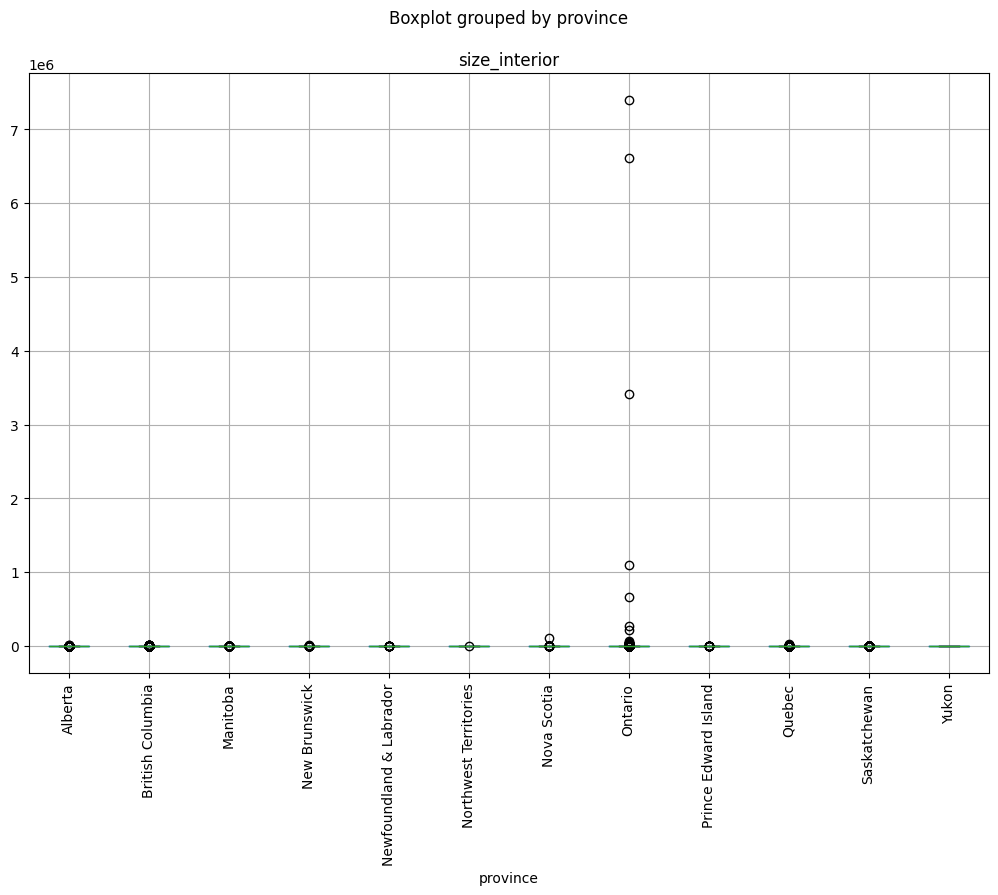

In [61]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [62]:
q0 = 0
q25 = df_init["size_interior"].quantile(0.25)
q75 = df_init["size_interior"].quantile(0.75)
iqr = q75 - q25

df = df[(df["size_interior"]>=abs(q25-q0)*0.33) & (df["size_interior"] < (q75+1.5*iqr))]

abs(q25-q0)*0.33

335.94

<Axes: title={'center': 'size_interior'}, xlabel='province'>

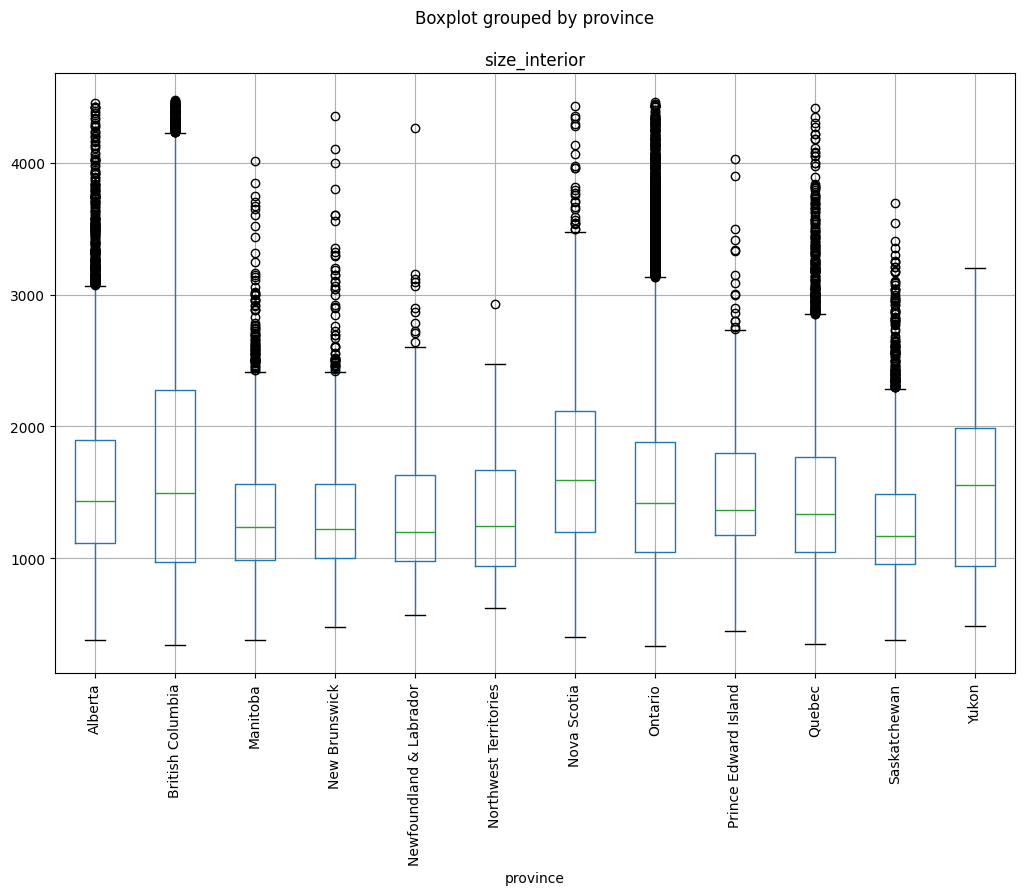

In [63]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

<Axes: title={'center': 'price'}, xlabel='province'>

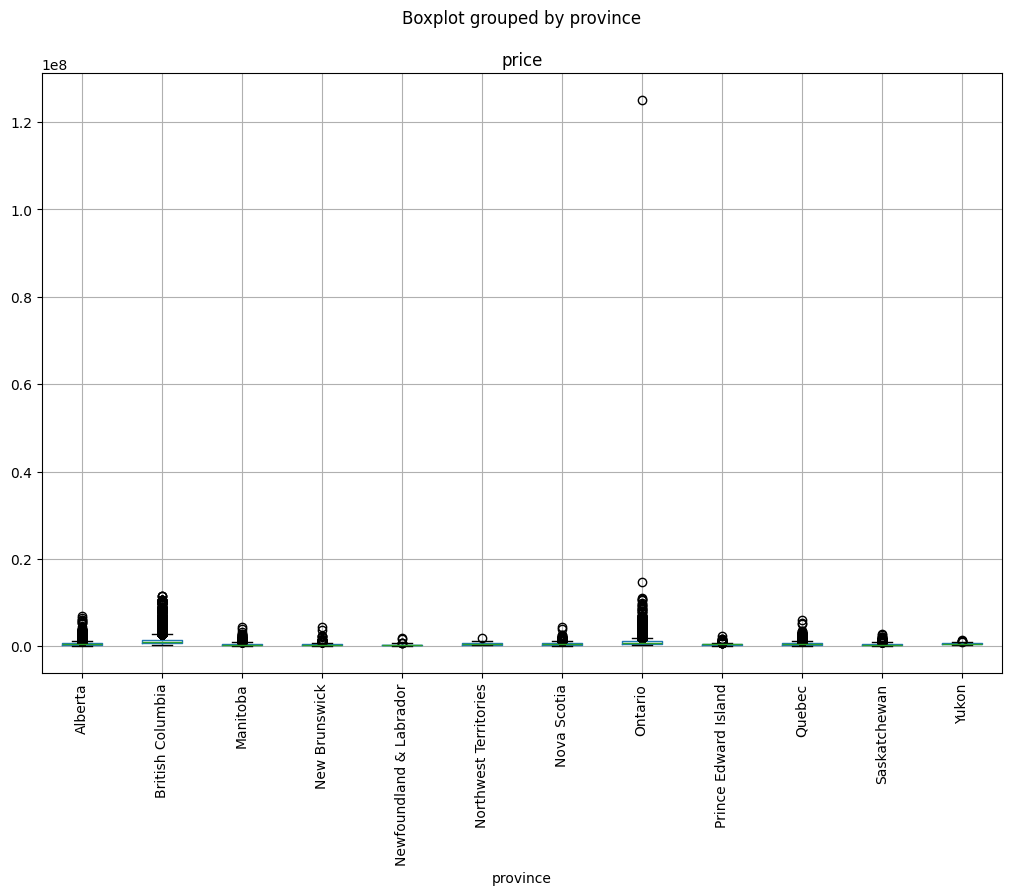

In [64]:
df.boxplot(column="price", by="province", figsize=(12,8), rot=90)

In [65]:
df["province"].value_counts()

province
Ontario                    47923
British Columbia           24175
Alberta                    14578
Quebec                      7494
Saskatchewan                4420
Manitoba                    3278
Nova Scotia                 1842
New Brunswick               1363
Prince Edward Island         393
Newfoundland & Labrador      391
Yukon                         98
Northwest Territories         56
Name: count, dtype: int64

In [66]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count        47923.0
mean        936821.0
std         794074.0
min         159900.0
25%         599900.0
50%         799900.0
75%        1099000.0
max      124960000.0
Name: price, dtype: float64

In [67]:
from sklearn.neighbors import LocalOutlierFactor

In [68]:
lof = LocalOutlierFactor(n_neighbors=10)
lof_labels = lof.fit_predict(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])

df = df[lof_labels==1]

<Axes: title={'center': 'size_interior'}, xlabel='province'>

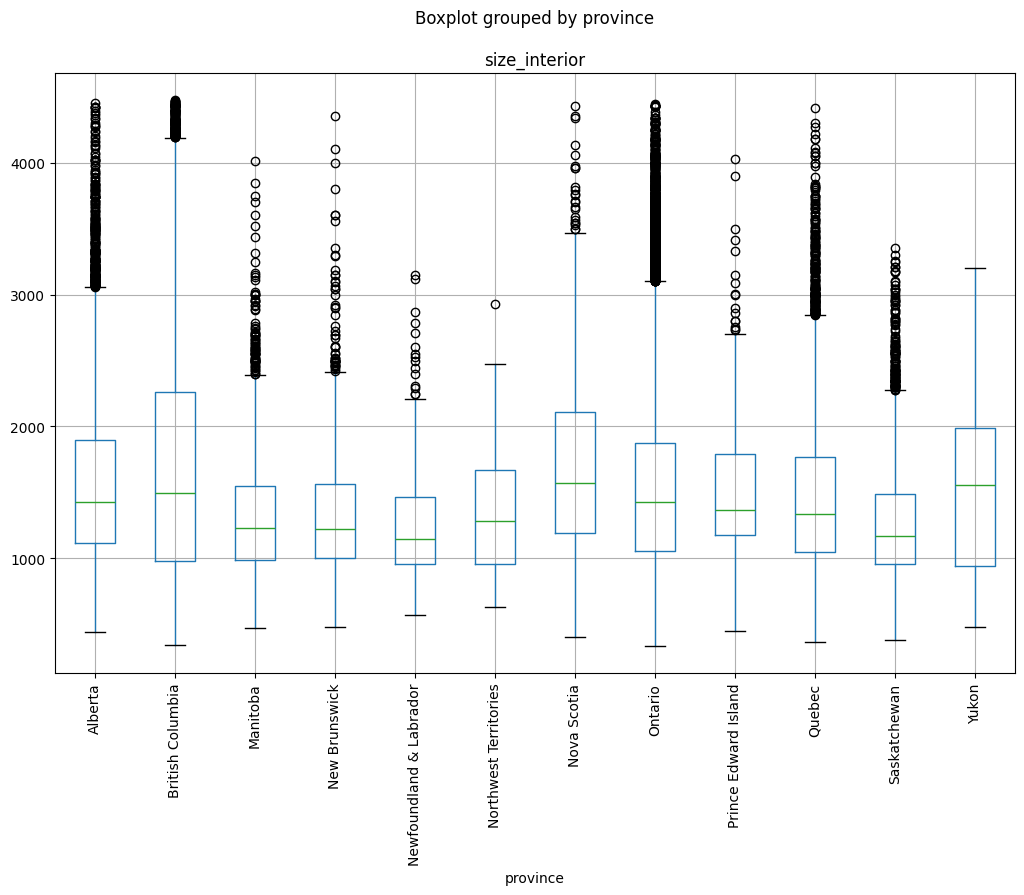

In [69]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100236 entries, 0 to 106465
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100236 non-null  int64  
 1   id_mls                    100236 non-null  object 
 2   bathrooms_total           100236 non-null  float64
 3   bedrooms_extra            100236 non-null  float64
 4   bedrooms                  100236 non-null  float64
 5   stories_total             100236 non-null  float64
 6   size_interior             100236 non-null  float64
 7   building_type             100236 non-null  object 
 8   agency_name               100236 non-null  object 
 9   agency_type               100236 non-null  object 
 10  property_type             100236 non-null  object 
 11  lng                       100236 non-null  float64
 12  lat                       100236 non-null  float64
 13  ownership_type            100236 non-null  object

In [71]:
df["province"].value_counts()

province
Ontario                    45416
British Columbia           22634
Alberta                    13701
Quebec                      7296
Saskatchewan                4165
Manitoba                    3096
Nova Scotia                 1739
New Brunswick               1321
Prince Edward Island         371
Newfoundland & Labrador      345
Yukon                         97
Northwest Territories         55
Name: count, dtype: int64

In [72]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       45416.0
mean       929956.0
std        540734.0
min        159900.0
25%        599900.0
50%        799900.0
75%       1099000.0
max      10500000.0
Name: price, dtype: float64

In [73]:
df.to_csv("data/lof/data-lof-2024-04-15.csv", index=False)